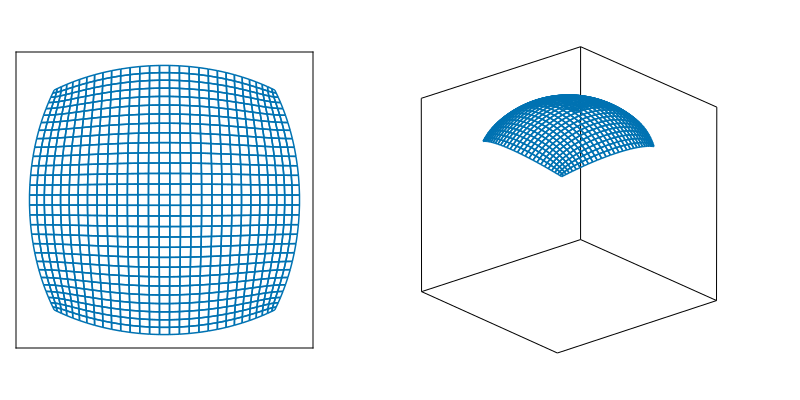

In [5]:
using CairoMakie
using CubedSphere

N = 30

x = range(-1, 1, length=N)
y = range(-1, 1, length=N)

X = zeros(length(x), length(y))
Y = zeros(length(x), length(y))
Z = zeros(length(x), length(y))

for (j, y′) in enumerate(y), (i, x′) in enumerate(x)
    X[i, j], Y[i, j], Z[i, j] = conformal_cubed_sphere_mapping(x′, y′)
end

fig = Figure(resolution = (800, 400))

ax2D = Axis(fig[1, 1], aspect = 1)
ax3D = Axis3(fig[1, 2], aspect = (1, 1, 1), limits = ((-1, 1), (-1, 1), (-1, 1)))

for ax in [ax2D, ax3D]
    hidedecorations!(ax)
    wireframe!(ax, X, Y, Z)
end

colsize!(fig.layout, 1, Auto(0.8))
colgap!(fig.layout, 40)

current_figure()

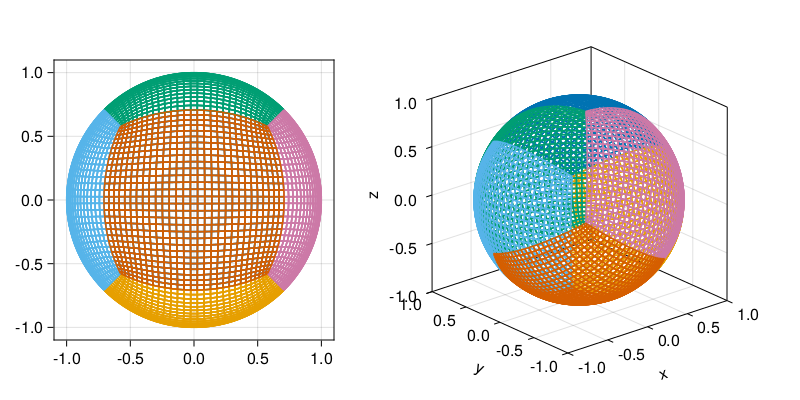

In [6]:
using Rotations

fig = Figure(resolution = (800, 400))

ax2D = Axis(fig[1, 1], aspect = 1)
ax3D = Axis3(fig[1, 2], aspect = (1, 1, 1), limits = ((-1, 1), (-1, 1), (-1, 1)))

for ax in [ax2D, ax3D]
    wireframe!(ax, X, Y, Z)
end

rotations = (RotX(π/2), RotX(-π/2), RotY(π/2), RotY(-π/2), RotX(π))

for R in rotations
    X′ = similar(X)
    Y′ = similar(Y)
    Z′ = similar(Z)

    for I in CartesianIndices(X)
        X′[I], Y′[I], Z′[I] = R * [X[I], Y[I], Z[I]]
    end

    for ax in [ax2D, ax3D]
        wireframe!(ax, X′, Y′, Z′)
    end
end

colsize!(fig.layout, 1, Auto(0.8))
colgap!(fig.layout, 40)

current_figure()

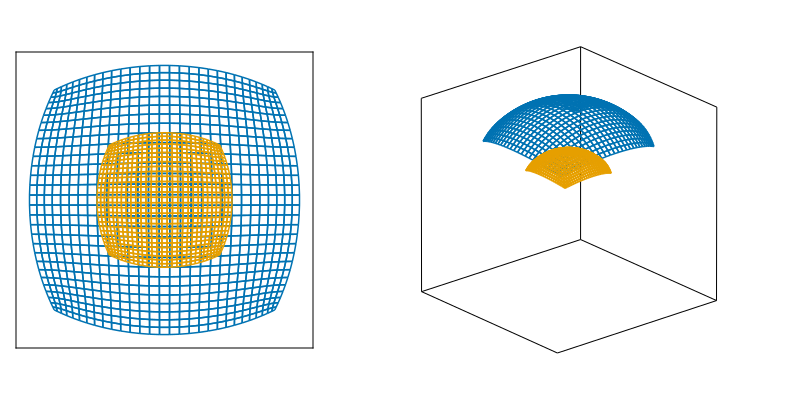

In [16]:
using CairoMakie
using CubedSphere

N = 30

x = range(-1, 1, length=N)
y = range(-1, 1, length=N)

X = zeros(length(x), length(y))
Y = zeros(length(x), length(y))
Z = zeros(length(x), length(y))

X2 = zeros(length(x), length(y))
Y2 = zeros(length(x), length(y))
Z2 = zeros(length(x), length(y))

for (j, y′) in enumerate(y), (i, x′) in enumerate(x)
    X[i, j], Y[i, j], Z[i, j] = conformal_cubed_sphere_mapping(x′, y′)
    X2[i, j], Y2[i, j], Z2[i, j] = (0.5, 0.5, 0.5) .* conformal_cubed_sphere_mapping(x′, y′)
end

fig = Figure(resolution = (800, 400))

ax2D = Axis(fig[1, 1], aspect = 1)
ax3D = Axis3(fig[1, 2], aspect = (1, 1, 1), limits = ((-1, 1), (-1, 1), (-1, 1)))

for ax in [ax2D, ax3D]
    hidedecorations!(ax)
    wireframe!(ax, X, Y, Z)
    wireframe!(ax, X2, Y2, Z2)
end

colsize!(fig.layout, 1, Auto(0.8))
colgap!(fig.layout, 40)

current_figure()

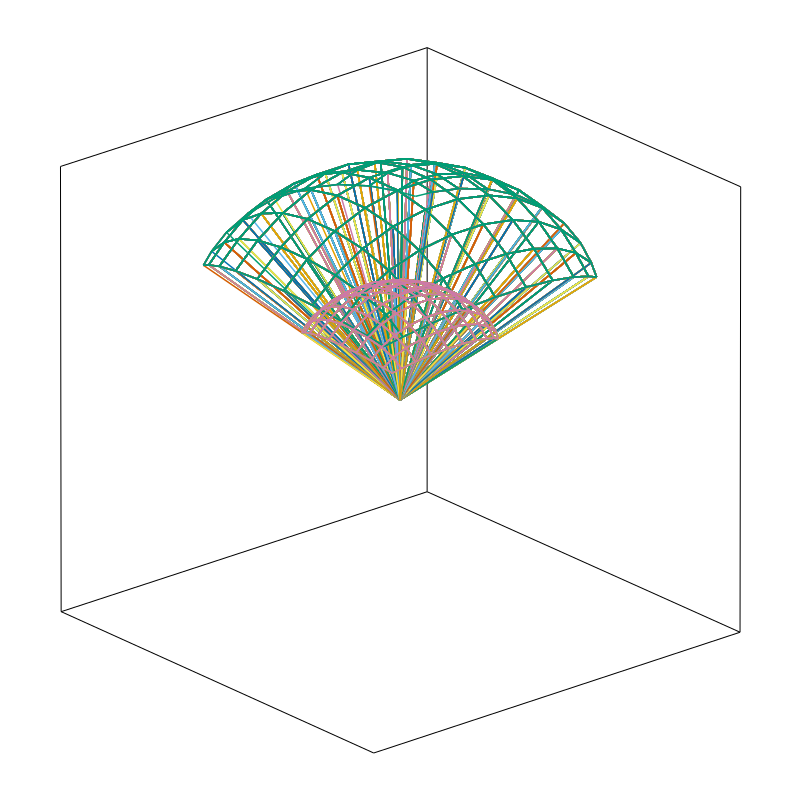

In [39]:
using CairoMakie
using CubedSphere

N = 10

x = range(-1, 1, length=N)
y = range(-1, 1, length=N)

X = zeros(length(x), length(y))
Y = zeros(length(x), length(y))
Z = zeros(length(x), length(y))

X2 = zeros(length(x), length(y))
Y2 = zeros(length(x), length(y))
Z2 = zeros(length(x), length(y))

fig = Figure(resolution = (800, 800))
ax3D = Axis3(fig[1,1], aspect = (1, 1, 1), limits = ((-1, 1), (-1, 1), (-1, 1)))

hidedecorations!(ax3D)

for (j, y′) in enumerate(y), (i, x′) in enumerate(x)
    # for r in 0.5:0.5:1.0
    #     X[i, j], Y[i, j], Z[i, j] = (r, r, r) .* conformal_cubed_sphere_mapping(x′, y′)
    # end
    X[i, j], Y[i, j], Z[i, j] = conformal_cubed_sphere_mapping(x′, y′)
    X2[i, j], Y2[i, j], Z2[i, j] = (0.5, 0.5, 0.5) .* conformal_cubed_sphere_mapping(x′, y′)
    wireframe!(ax3D, X, Y, Z)
    wireframe!(ax3D, X2, Y2, Z2)
end


current_figure()

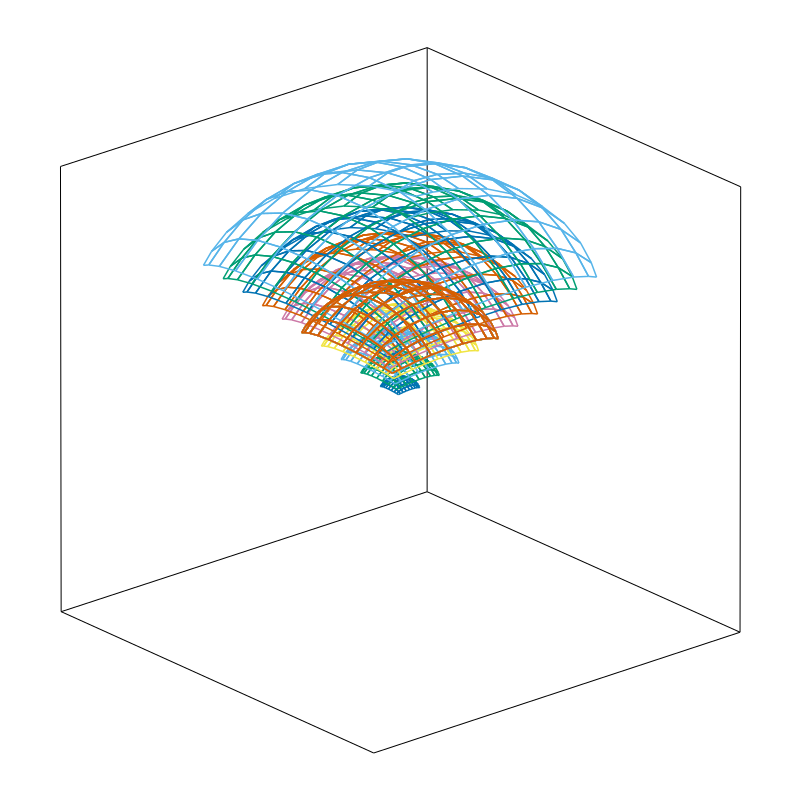

In [40]:
using CairoMakie
using CubedSphere

N = 10

x = range(-1, 1, length=N)
y = range(-1, 1, length=N)

fig = Figure(resolution=(800, 800))
ax3D = Axis3(fig[1, 1], aspect=(1, 1, 1), limits=((-1, 1), (-1, 1), (-1, 1)))

hidedecorations!(ax3D)

# Loop over radial distances from 0.1 to 1.0 with a step of 0.1
for r in 0.1:0.1:1.0
    X = zeros(length(x), length(y))
    Y = zeros(length(x), length(y))
    Z = zeros(length(x), length(y))

    X2 = zeros(length(x), length(y))
    Y2 = zeros(length(x), length(y))
    Z2 = zeros(length(x), length(y))

    for (j, y′) in enumerate(y), (i, x′) in enumerate(x)
        X[i, j], Y[i, j], Z[i, j] = r .* conformal_cubed_sphere_mapping(x′, y′)
        X2[i, j], Y2[i, j], Z2[i, j] = (0.5, 0.5, 0.5) .* conformal_cubed_sphere_mapping(x′, y′)
    end

    wireframe!(ax3D, X, Y, Z)
    wireframe!(ax3D, X2, Y2, Z2)
end

current_figure()


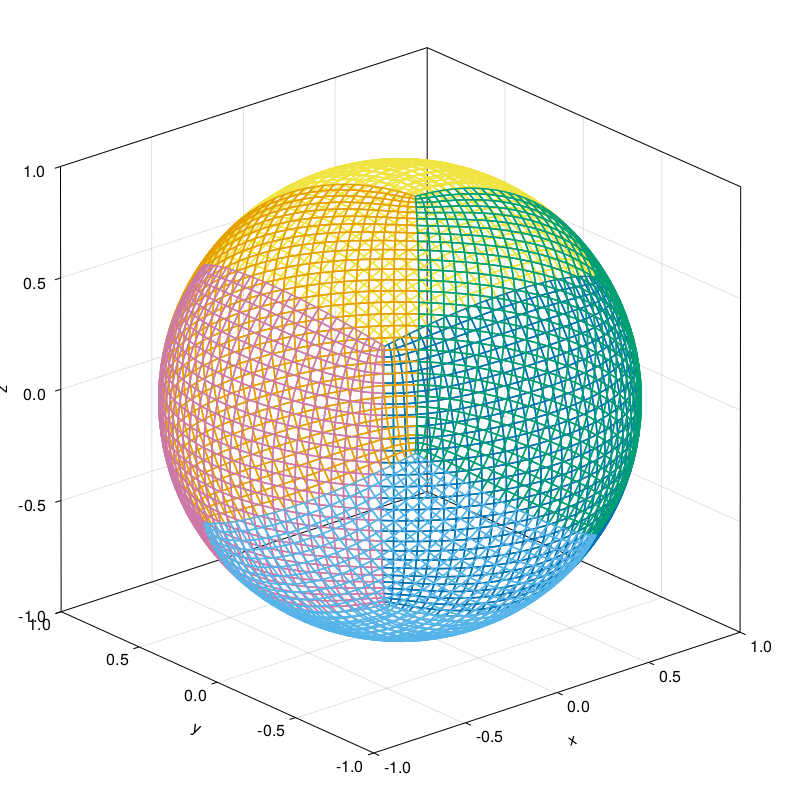

In [53]:
using CairoMakie
using CubedSphere
using Rotations

rotations = (RotX(π/2), RotX(-π/2), RotY(π/2), RotY(-π/2), RotX(π))

N = 10

x = range(-1, 1, length=N)
y = range(-1, 1, length=N)

fig = Figure(resolution=(800, 800))
ax3D = Axis3(fig[1, 1], aspect=(1, 1, 1), limits=((-1, 1), (-1, 1), (-1, 1)))

# hidedecorations!(ax3D)

# Loop over radial distances from 0.3 to 1.0 with a step of 0.3
for r in 0.3:0.3:1.0
    X = zeros(length(x), length(y))
    Y = zeros(length(x), length(y))
    Z = zeros(length(x), length(y))

    X2 = zeros(length(x), length(y))
    Y2 = zeros(length(x), length(y))
    Z2 = zeros(length(x), length(y))

    for (j, y′) in enumerate(y), (i, x′) in enumerate(x)
        X[i, j], Y[i, j], Z[i, j] = r .* conformal_cubed_sphere_mapping(x′, y′)
    end

    wireframe!(ax3D, X, Y, Z)

    for R in rotations
        X′ = similar(X)
        Y′ = similar(Y)
        Z′ = similar(Z)
    
        for I in CartesianIndices(X)
            X′[I], Y′[I], Z′[I] = R * [X[I], Y[I], Z[I]]
        end

        wireframe!(ax3D, X′, Y′, Z′)

    end

end



current_figure()
